# First-Order system
$H(s) = \frac{K}{\tau s+1}$

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl
from scipy import signal

In [16]:
# System - A
sysA_K = 1.0         # Desired steady-state gain
sysA_tau = 0.5      # Fast response (small time constant)
sysA = ctrl.TransferFunction([sysA_K], [sysA_tau, 1])

# System - B
sysB_K = 1.5       # Incorrect steady-state gain
sysB_tau = 3.0     # Slow response (large time constant)
sysB = ctrl.TransferFunction([sysB_K], [sysB_tau, 1])

In [29]:
# Time vector
t = np.linspace(0, 20, 2000)

# # Step Response

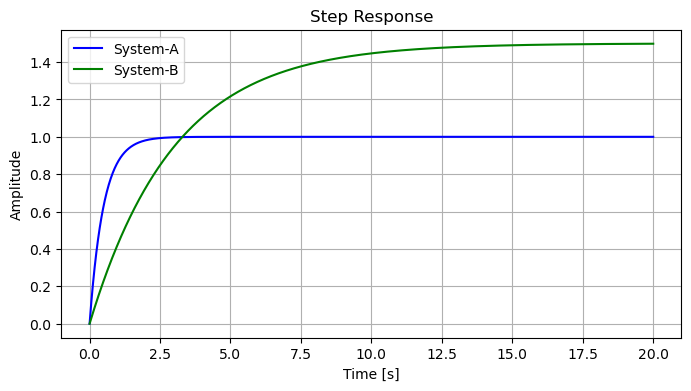

In [30]:
# System-A - Step response
sysA_t_step, sysA_y_step = ctrl.step_response(sysA, T=t)
sysB_t_step, sysB_y_step = ctrl.step_response(sysB, T=t)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

ax.plot(sysA_t_step, sysA_y_step, label='System-A', color='blue')
ax.plot(sysB_t_step, sysB_y_step, label='System-B', color='green')
ax.set_title('Step Response')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude')
ax.grid(True)
ax.legend()

plt.show()

# # Frequency Response (Bode Plot)

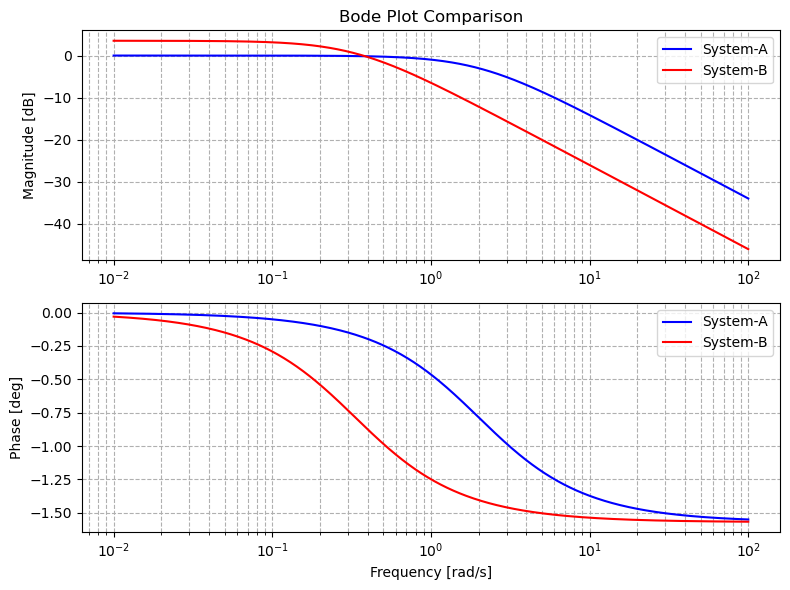

System-A cutoff frequency: -0.50-0.00j rad/s (τ=0.5s)
System-B cutoff frequency: -3.00-0.00j rad/s (τ=3.0s)


In [40]:
# Frequency range
w = np.logspace(-2, 2, 500)

# Calculate Bode plots
sysA_mag, sysA_phase, sysA_omega = ctrl.bode(sysA, w, dB=True, deg=True, plot=False)
sysB_mag, sysB_phase, sysA_omega = ctrl.bode(sysB, w, dB=True, deg=True, plot=False)

# Create figure with two subplots
plt.figure(figsize=(8, 6))

# Magnitude plot
plt.subplot(2, 1, 1)
plt.semilogx(sysA_omega, 20*np.log10(sysA_mag), 'b', label='System-A')
plt.semilogx(sysA_omega, 20*np.log10(sysB_mag), 'r', label='System-B')
plt.title('Bode Plot Comparison')
plt.ylabel('Magnitude [dB]')
plt.grid(which='both', linestyle='--')
plt.legend()

# Phase plot
plt.subplot(2, 1, 2)
plt.semilogx(sysA_omega, sysA_phase, 'b', label='System-A')
plt.semilogx(sysA_omega, sysB_phase, 'r', label='System-B')
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Phase [deg]')
plt.grid(which='both', linestyle='--')
plt.legend()

plt.tight_layout()
plt.show()

# Calculate and print cutoff frequencies (-3dB points)
sysA_cutoff = 1/sysA.pole()[0]  # ω_c = 1/τ
sysB_cutoff = 1/sysB.pole()[0]    # ω_c = 1/τ

print(f"System-A cutoff frequency: {sysA_cutoff:.2f} rad/s (τ=0.5s)")
print(f"System-B cutoff frequency: {sysB_cutoff:.2f} rad/s (τ=3.0s)")

# # Impulse Response

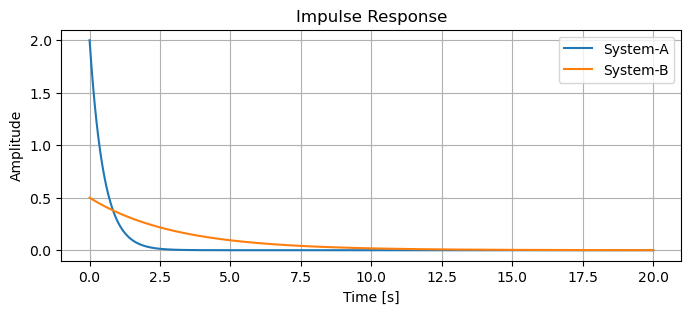

In [47]:
# Impulse response
sysA_t_impulse, sysA_y_impulse = ctrl.impulse_response(sysA, T=t)
sysB_t_impulse, sysB_y_impulse = ctrl.impulse_response(sysB, T=t)

# Plot
plt.figure(figsize=(8, 3))
plt.plot(sysA_t_impulse, sysA_y_impulse, label="System-A")
plt.plot(sysB_t_impulse, sysB_y_impulse, label="System-B")
plt.title('Impulse Response')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

# # Pole-Zero Map

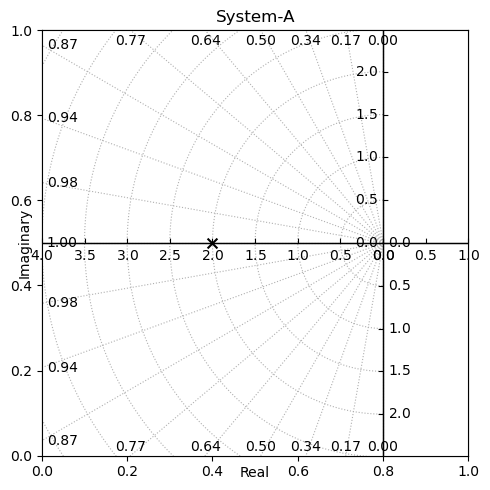

In [76]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

ctrl.pzmap(sysA, title='System-A', grid=True)
plt.xlim([-4, 1])

plt.tight_layout()
plt.show()

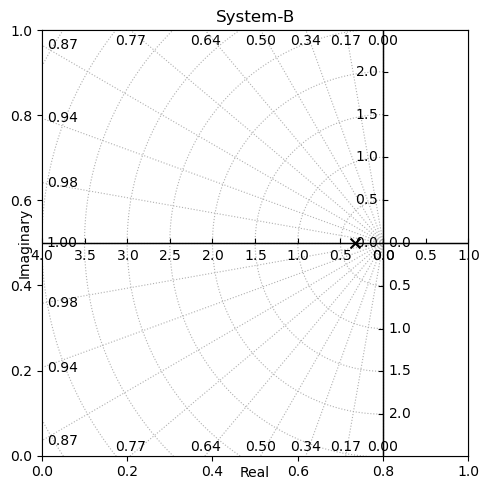

In [73]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

ctrl.pzmap(sysB, title='System-B', grid=True)
plt.xlim([-4, 1])

plt.tight_layout()
plt.show()

In [74]:
# Print pole locations
print("System-A pole:", sysA.pole())
print("System-B pole:", sysB.pole())

# Calculate and print stability margins
print("\nStability analysis:")
print(f"System-A: Pole at s = {-1/0.5:.2f} (stable)")
print(f"System-B: Pole at s = {-1/3.0:.2f} (stable but slower)")

System-A pole: [-2.+0.j]
System-B pole: [-0.33333333+0.j]

Stability analysis:
System-A: Pole at s = -2.00 (stable)
System-B: Pole at s = -0.33 (stable but slower)


### System Analysis
- Both systems are stable (poles in left half-plane)
- System-A's pole is at farther left -> faster dynamics
- System-B's pole is at near to imaginary axis -> slower dynamics
- Pole location directly determines time constant (τ = -1/pole)
- No-Zero present in both the systems -> Pure First-Order System

# # Nyquist Plot

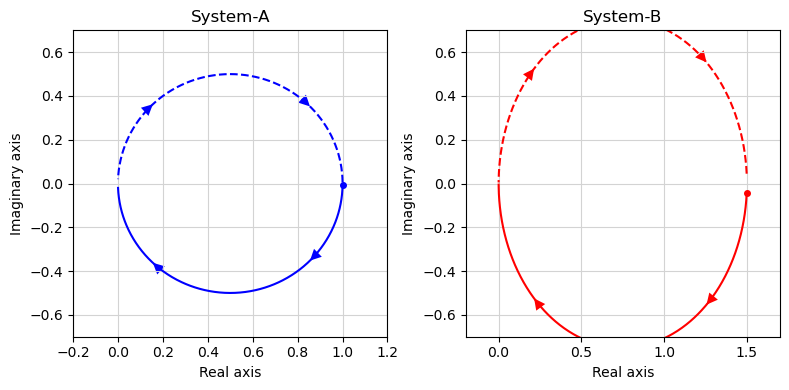

In [79]:
# Create frequency range
w = np.logspace(-2, 2, 1000)  # 0.01 to 100 rad/sec

# Create figure
plt.figure(figsize=(8, 4))

# System-A Nyquist plot
plt.subplot(1, 2, 1)
ctrl.nyquist_plot(sysA, w, color='b')
plt.title('System-A')
plt.grid(True)
plt.xlim([-0.2, 1.2])
plt.ylim([-0.7, 0.7])

# System-B Nyquist plot
plt.subplot(1, 2, 2)
ctrl.nyquist_plot(sysB, w, color='r')
plt.title('System-B')
plt.grid(True)
plt.xlim([-0.2, 1.7])
plt.ylim([-0.7, 0.7])

plt.tight_layout()
plt.show()

In [80]:
# Calculate key Nyquist points
print("System-A Nyquist Characteristics:")
print(f"DC Gain (ω→0): {ctrl.evalfr(sysA, 1e-10):.2f}")
print(f"High Frequency (ω→∞): {ctrl.evalfr(sysA, 1e10):.2f}")

print("\nSystem-B Nyquist Characteristics:")
print(f"DC Gain (ω→0): {ctrl.evalfr(sysB, 1e-10):.2f}")
print(f"High Frequency (ω→∞): {ctrl.evalfr(sysB, 1e10):.2f}")

System-A Nyquist Characteristics:
DC Gain (ω→0): 1.00+0.00j
High Frequency (ω→∞): 0.00+0.00j

System-B Nyquist Characteristics:
DC Gain (ω→0): 1.50+0.00j
High Frequency (ω→∞): 0.00+0.00j


### System Analysis
**Shape Charactristics:**
- Both plots show semicircles -> characteristic of 1st order systems
- System-A smaller diameter (gain = 1.0) -> Good
- System-B larger diameter (gain = 1.5) -> Bad

**Frequency Response:**
- DC gain (ω→0):
  - System-A: 1.0 + 0j (real axis)
  - System-B: 1.5 + 0j (real axis)
- High frequency (ω→∞):
  - Both approach 0 + 0j (origin)

**Stability Information:**
- Neither plot encircles -1 point
- Both systems are open-loop stable
- Phase never crosses -180°

**Performance Differences:**
- System-A reaches higher frequencies faster (smaller τ) -> Good System
- System-B has larger low-frequency gain (higher K) -> Bad System

**Overall:**
- The System-A's (Good system) tighter curve indicates better performance
- The System-B's (Bad system) larger curve shows higher gain but slower response
- Both maintain stability (no encirclements of -1)